### Pre-requisites
    Python 
    Data Visualization
    Descriptive Statistics
    Machine Learning
    Data Cleaning and Preprocessing


### Dataset Feature Descriptions
    Store - Store number.
    Date -  Week of Sales.
    Weekly_Sales - Sales for the given store in that week
    Temperature - Average temperature in the region.
    Fuel_Price - Cost of fuel in the region.
    CPI - Consumer price index.
    Unemployment - Unemployment rate.
    Holiday_flag - If it is a holiday week

### 1. Data Load

In [83]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'H:\01_Intellipath_project\01_Walmart_Capstone_Project\Source\Walmart DataSet.csv')
# df.set_index('Date', inplace=True)

In [3]:
df.shape

(6435, 8)

In [4]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
#Explore variables, their data types, and total non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 377.1+ KB


### 2. Data Wrangling
    In this section, I will identify and address any errors, inconsistencies, missing values, or duplicate entries in the dataset. This will ensure that the dataset is accurate, consistent, and complete, and will make it more suitable for analysis.

    Thus I will address the following questions to ensure the quality and reliability of the dataset:

    # Are there any missing values in the dataset, and if so, what is their extent and data type?
    # Are there any duplicate entries in the dataset?
    # Are there any outliers in the dataset that may impact the analysis?
    # Does the dataset require any feature engineering to better support the analysis goals?


In [6]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
pd.options.display.float_format = '{:.2f}'.format # display number in floating dispite of scientific number

### 3. Exploratory Data Analysis
    Exploratory data analysis (EDA) using various visualization techniques to identify underlying patterns 
    and correlations that can help us derive insights.
    
    This section explores the dataset in order to extract useful information.
    
    What are the summary statistics of the dataset?
    

In [9]:
# summary statistics of the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


#### Insight
    the average weekly sales are 1046964  
    the average CPI is 171 
    the average Temp is 60.66

#### Range of dates for which weekly sales data is available

In [10]:
# df.reset_index()


In [11]:
print('Min Date in Data is - {}'.format(df['Date'].min()))
print('Max Date in Data is - {}'.format(df['Date'].max()))
print('Unique store in Data are - {}'.format(df['Store'].unique()))


Min Date in Data is - 01-04-2011
Max Date in Data is - 31-12-2010
Unique store in Data are - [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [12]:
# # Weekly Sales distribution of stores for each store type
# plt.figure(figsize = (12,8))
# sns.boxplot(x = 'Weekly_Sales', y ='Unemployment', data = df, showfliers = False)


In [13]:
weekly_sale =df.groupby(['Date','Store'])['Weekly_Sales'].sum()
weekly_sale

Date        Store
01-04-2011  1       1495064.75
            2       1800171.36
            3        374556.08
            4       1900246.47
            5        314316.55
                       ...    
31-12-2010  41      1001790.16
            42       428953.60
            43       534740.30
            44       241937.11
            45       679156.20
Name: Weekly_Sales, Length: 6435, dtype: float64

In [14]:
# max_sales = df.groupby('Store')['Weekly_Sales'].sum()
# # display(max_sales)
# max_sales.idxmax()
# # max_sales.idxmin()

In [15]:
df_h= df[df['Holiday_Flag']==1]

In [16]:
df_h.shape

(450, 8)

In [17]:
df_h.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
31,1,10-09-2010,1507460.69,1,78.69,2.56,211.50,7.79
42,1,26-11-2010,1955624.11,1,64.52,2.73,211.75,7.84
47,1,31-12-2010,1367320.01,1,48.43,2.94,211.40,7.84
53,1,11-02-2011,1649614.93,1,36.39,3.02,212.94,7.74


In [18]:
df_h.set_index('Date', inplace=True)

In [19]:
df_hdate =df_h.index.tolist()

In [20]:
holiday = list(set(df_hdate)) # remove duplicate by converting into set 

In [21]:
holiday # list of holiday

['10-02-2012',
 '10-09-2010',
 '31-12-2010',
 '30-12-2011',
 '25-11-2011',
 '11-02-2011',
 '09-09-2011',
 '26-11-2010',
 '12-02-2010',
 '07-09-2012']

In [22]:
# df_hd_2010 = [item for item in df_hdate if '2010' in item]  

In [23]:
# df_uniq_date =df.index.tolist() # list all the date 

In [24]:
# df_uniq_date = list(set(df_uniq_date)) # remove duplicate by converting into set 

In [25]:
# df_uniq_date

In [26]:
df.set_index('Date', inplace=True)
sales = pd.DataFrame(df.groupby([df.index])['Weekly_Sales'].sum())
sales

,Weekly_Sales
Date,
01-04-2011,43458991.19
01-06-2012,48281649.72
01-07-2011,47578519.50
01-10-2010,42239875.87
02-03-2012,46861034.97
...,...
30-07-2010,44630363.42
30-09-2011,42195830.81
30-12-2011,46042461.04


In [27]:
# sales = sales.reset_index(inplace=True)
sales = sales.sort_values(by='Weekly_Sales')


In [28]:
sales.reset_index(inplace=True)

In [29]:
sales_2010 = sales[sales['Date'].str.contains('2010')]
sales_2011 = sales[sales['Date'].str.contains('2011')]
sales_2012 = sales[sales['Date'].str.contains('2012')]


In [30]:
sales_2010.shape

(48, 2)

In [31]:
sales_2011.shape

(52, 2)

In [32]:
sales_2012.shape

(43, 2)

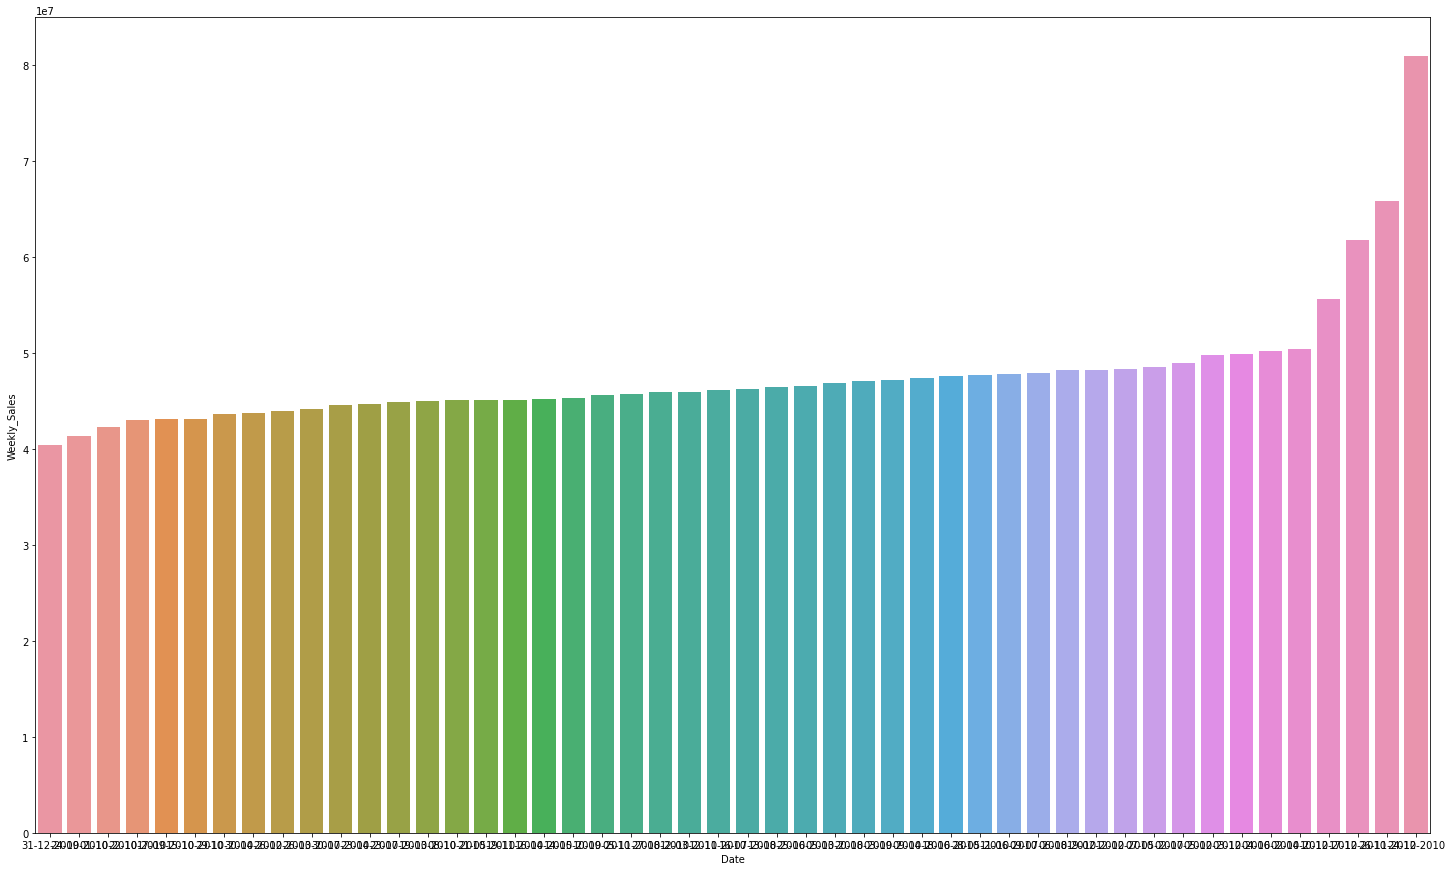

In [33]:
plt.figure(figsize=(25,15))
sns.barplot(x=sales_2010.Date, y = sales_2010.Weekly_Sales)

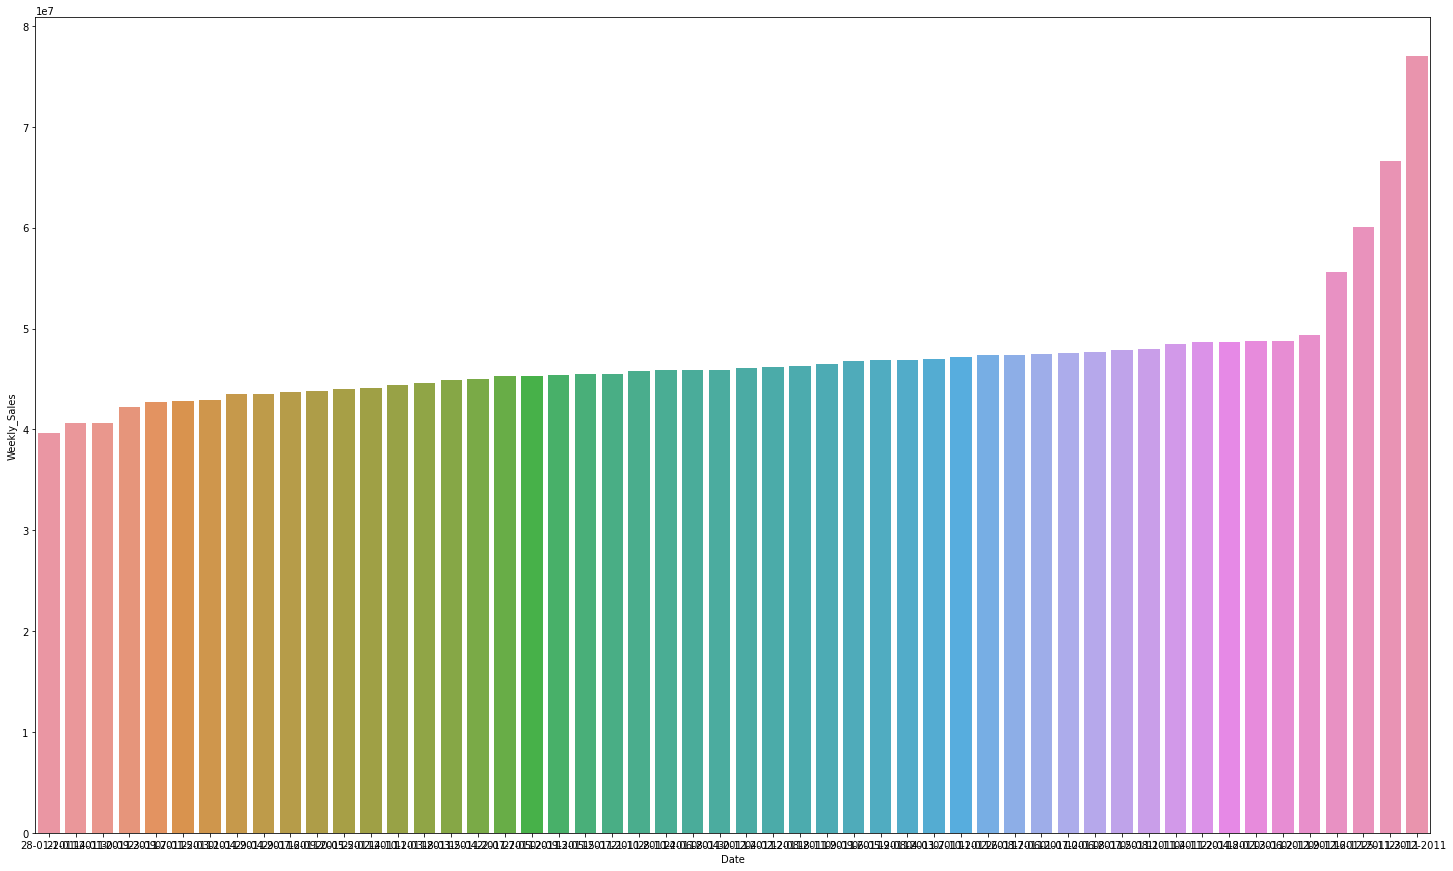

In [34]:
plt.figure(figsize=(25,15))
sns.barplot(x=sales_2011.Date, y = sales_2011.Weekly_Sales)

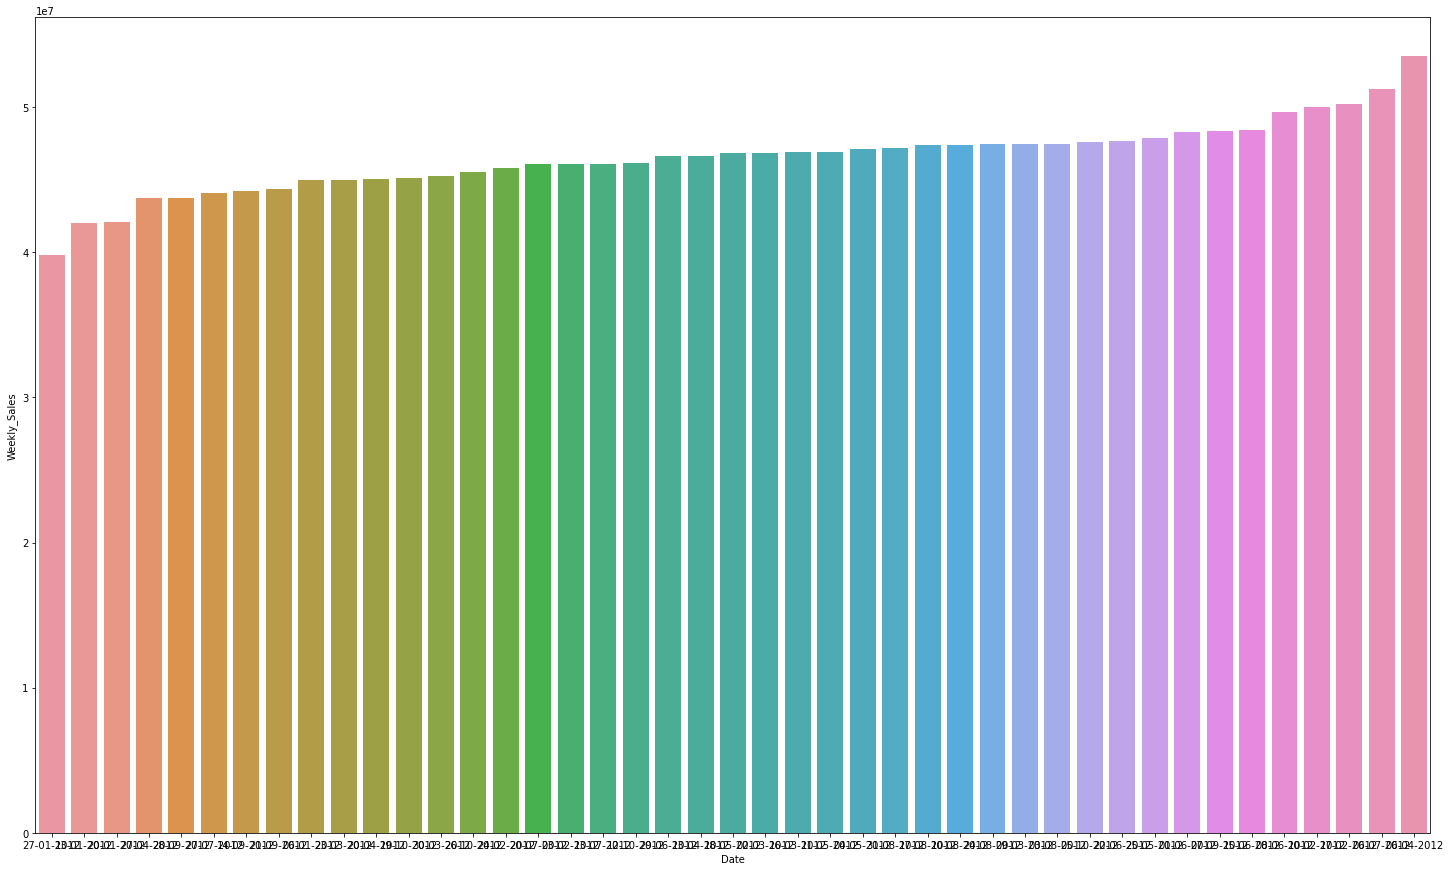

In [35]:
plt.figure(figsize=(25,15))
sns.barplot(x=sales_2012.Date, y = sales_2012.Weekly_Sales)

In [36]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index() # reset_index of the resulting DF to make it easier 

In [37]:
store_sales.head()

,Store,Weekly_Sales
0,1,222402808.85
1,2,275382440.98
2,3,57586735.07
3,4,299543953.38
4,5,45475688.90


In [38]:
# Identify the max selling store and botton selling store and difference

In [39]:
max_sales = df.groupby('Store')['Weekly_Sales'].sum()
# display(max_sales)
print('Max sales store is',max_sales.idxmax())
print('Max sales store is',max_sales.idxmin())
# print('Max sales store is',max_sales['Weekly_Sales']==

print('Difference b/w the highest & lowest performing stores is', max_sales[max_sales.idxmax()]-max_sales[max_sales.idxmin()])

Max sales store is 20
Max sales store is 33
Difference b/w the highest & lowest performing stores is 264237570.50000003


### Insight 
    Top performing store according to the historical data is - 20
    The worst performing store is - 33, 
    Difference between the highest and lowest performing stores is 264237570.50000003

In [40]:
store_sales.sort_values(by='Weekly_Sales',ascending=False) # list weekly sales store wise

,Store,Weekly_Sales
19,20,301397792.46
3,4,299543953.38
13,14,288999911.34
12,13,286517703.80
1,2,275382440.98
9,10,271617713.89
26,27,253855916.88
5,6,223756130.64
0,1,222402808.85
38,39,207445542.47


### outliers identification in the dataset

In [41]:
def find_outlier_rows(dfx, col, level='both'):
    """
    Finds the rows with outliers in a given column of a dataframe.

    This function takes a dataframe and a column as input, and returns the rows
    with outliers in the given column. Outliers are identified using the
    interquartile range (IQR) formula. The optional level parameter allows the
    caller to specify the level of outliers to return, i.e., lower, upper, or both.

    Args:
        df: The input dataframe.
        col: The name of the column to search for outliers.
        level: The level of outliers to return, i.e., 'lower', 'upper', or 'both'.
               Defaults to 'both'.

    Returns:
        A dataframe containing the rows with outliers in the given column.
    """
    # compute the interquartile range
    iqr = dfx[col].quantile(0.75) - dfx[col].quantile(0.25)

    # compute the upper and lower bounds for identifying outliers
    lower_bound = dfx[col].quantile(0.25) - 1.5 * iqr
    upper_bound = dfx[col].quantile(0.75) + 1.5 * iqr

    # filter the rows based on the level of outliers to return
    if level == 'lower':
        return dfx[dfx[col] < lower_bound]
    elif level == 'upper':
        return dfx[dfx[col] > upper_bound]
    else:
        return dfx[(dfx[col] > upper_bound) | (dfx[col] < lower_bound)]


In [42]:
def count_outliers(dfc):
    """
    This function takes in a DataFrame and returns a DataFrame containing the count and 
    percentage of outliers in each numeric column of the original DataFrame.

    Input:
        df: a Pandas DataFrame containing numeric columns

    Output:
        a Pandas DataFrame containing two columns:
        'outlier_counts': the number of outliers in each numeric column
        'outlier_percent': the percentage of outliers in each numeric column
    """
    # select numeric columns
    df_numeric = dfc.select_dtypes(include=['int', 'float'])

    # get column names
    columns = df_numeric.columns

    # find the name of all columns with outliers
    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]

    # dataframe to store the results
    outliers_df = pd.DataFrame(columns=['outlier_counts', 'outlier_percent'])

    # count the outliers and compute the percentage of outliers for each column
    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        # store the results in the dataframe
        outliers_df.loc[col] = [outlier_count, outlier_percent]

    # return the resulting dataframe
    return outliers_df

In [43]:
# count the outliers in sales dataframe
count_outliers(df).sort_values('outlier_counts', ascending=False)

,outlier_counts,outlier_percent
Unemployment,481.00,7.47
Weekly_Sales,34.00,0.53
Temperature,3.00,0.05


In [44]:
# create the pivot table
pivot_table_u = df.pivot_table(index='Store',  values=['Weekly_Sales','Unemployment']).sort_values(by='Weekly_Sales')
# display the pivot table
pivot_table_u

,Unemployment,Weekly_Sales
Store,,
33,8.53,259861.69
44,6.74,302748.87
5,6.30,318011.81
36,7.87,373511.99
38,13.12,385731.65
3,7.18,402704.44
30,7.62,438579.62
37,7.87,518900.28
16,6.48,519247.73


### insight
    1) The above dataframe shows that weekly_sales, temperature and unemployment columns all have outliers
    2) unemployment having the largest outlier percentage, 7%. 
    3) Examine the outliers in each column to decide on how to handle them.
    4) Highest unemployment percentage - 13.12
    5) Store 38 having less sales where highest unemployment percentage 13.12% reported
    6) Lowest sales reported in store 33 where unemployment percentage is 8.53
    7) Highest sales reported in store 20 where unemployment percentage is 7.37
    

In [45]:
# create the pivot table
pivot_table_t = df.pivot_table(index='Store',  values=['Weekly_Sales','Temperature']).sort_values(by='Weekly_Sales')
# display the pivot table
pivot_table_t

,Temperature,Weekly_Sales
Store,,
33,76.73,259861.69
44,53.70,302748.87
5,69.41,318011.81
36,71.16,373511.99
38,70.26,385731.65
3,71.43,402704.44
30,68.85,438579.62
37,71.16,518900.28
16,45.03,519247.73


In [46]:
# create the pivot table
pivot_table_c = df.pivot_table(index='Store',  values=['Weekly_Sales','CPI']).sort_values(by='Weekly_Sales')
# display the pivot table
pivot_table_c

,CPI,Weekly_Sales
Store,,
33,128.68,259861.69
44,128.68,302748.87
5,216.57,318011.81
36,214.73,373511.99
38,128.68,385731.65
3,219.39,402704.44
30,215.65,438579.62
37,214.73,518900.28
16,193.66,519247.73


In [47]:
# view the summary statistics of unemployment rate
find_outlier_rows(df, 'Unemployment')['Unemployment'].describe()


count   481.00
mean     11.45
std       3.89
min       3.88
25%      11.63
50%      13.50
75%      14.02
max      14.31
Name: Unemployment, dtype: float64

    75%, are more than or equal to 11.6%
    These values are obtainable in reality and will be left intact for the analysis. 
    Thus, median, which rubust to outliers, will be used to measure the centre of the unemployment rate distribution.

In [48]:
find_outlier_rows(df, 'Holiday_Flag')['Holiday_Flag'].describe()

count   450.00
mean      1.00
std       0.00
min       1.00
25%       1.00
50%       1.00
75%       1.00
max       1.00
Name: Holiday_Flag, dtype: float64

In [49]:
# find the outliers in weekly sales
find_outlier_rows(df, 'Weekly_Sales')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
24-12-2010,2,3436007.68,0,49.97,2.89,211.06,8.16
23-12-2011,2,3224369.80,0,46.66,3.11,219.00,7.44
26-11-2010,4,2789469.45,1,48.08,2.75,126.67,7.13
17-12-2010,4,2740057.14,0,46.57,2.88,126.88,7.13
24-12-2010,4,3526713.39,0,43.21,2.89,126.98,7.13
25-11-2011,4,3004702.33,1,47.96,3.23,129.84,5.14
16-12-2011,4,2771397.17,0,36.44,3.15,129.90,5.14
23-12-2011,4,3676388.98,0,35.92,3.10,129.98,5.14
24-12-2010,6,2727575.18,0,55.07,2.89,212.92,7.01


    We can note that all the weekly_sales outliers occur either in November or December

In [50]:
df.reset_index()

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,05-02-2010,1,1643690.90,0,42.31,2.57,211.10,8.11
1,12-02-2010,1,1641957.44,1,38.51,2.55,211.24,8.11
2,19-02-2010,1,1611968.17,0,39.93,2.51,211.29,8.11
3,26-02-2010,1,1409727.59,0,46.63,2.56,211.32,8.11
4,05-03-2010,1,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,28-09-2012,45,713173.95,0,64.88,4.00,192.01,8.68
6431,05-10-2012,45,733455.07,0,64.89,3.98,192.17,8.67
6432,12-10-2012,45,734464.36,0,54.47,4.00,192.33,8.67
6433,19-10-2012,45,718125.53,0,56.47,3.97,192.33,8.67


In [51]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [52]:
# split the date column
# Date column used in df as index and no more part of the df column
df['year']= pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day'] = pd.DatetimeIndex(df.index).day
df.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
Date,,,,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.57,211.10,8.11,2010,5,2
12-02-2010,1,1641957.44,1,38.51,2.55,211.24,8.11,2010,12,2
19-02-2010,1,1611968.17,0,39.93,2.51,211.29,8.11,2010,2,19


In [53]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00,2010.97,6.48,15.65
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88,0.80,3.32,8.75
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88,2010.00,1.00,1.00
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89,2010.00,4.00,8.00
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87,2011.00,6.00,16.00
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62,2012.00,9.00,23.00
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31,2012.00,12.00,31.00


    The weekly transactions occured over the period of three-year (2010-2012) in 45 stores. 
    The maximum weekly sales is $3.8 million and the hottest day was 100°F

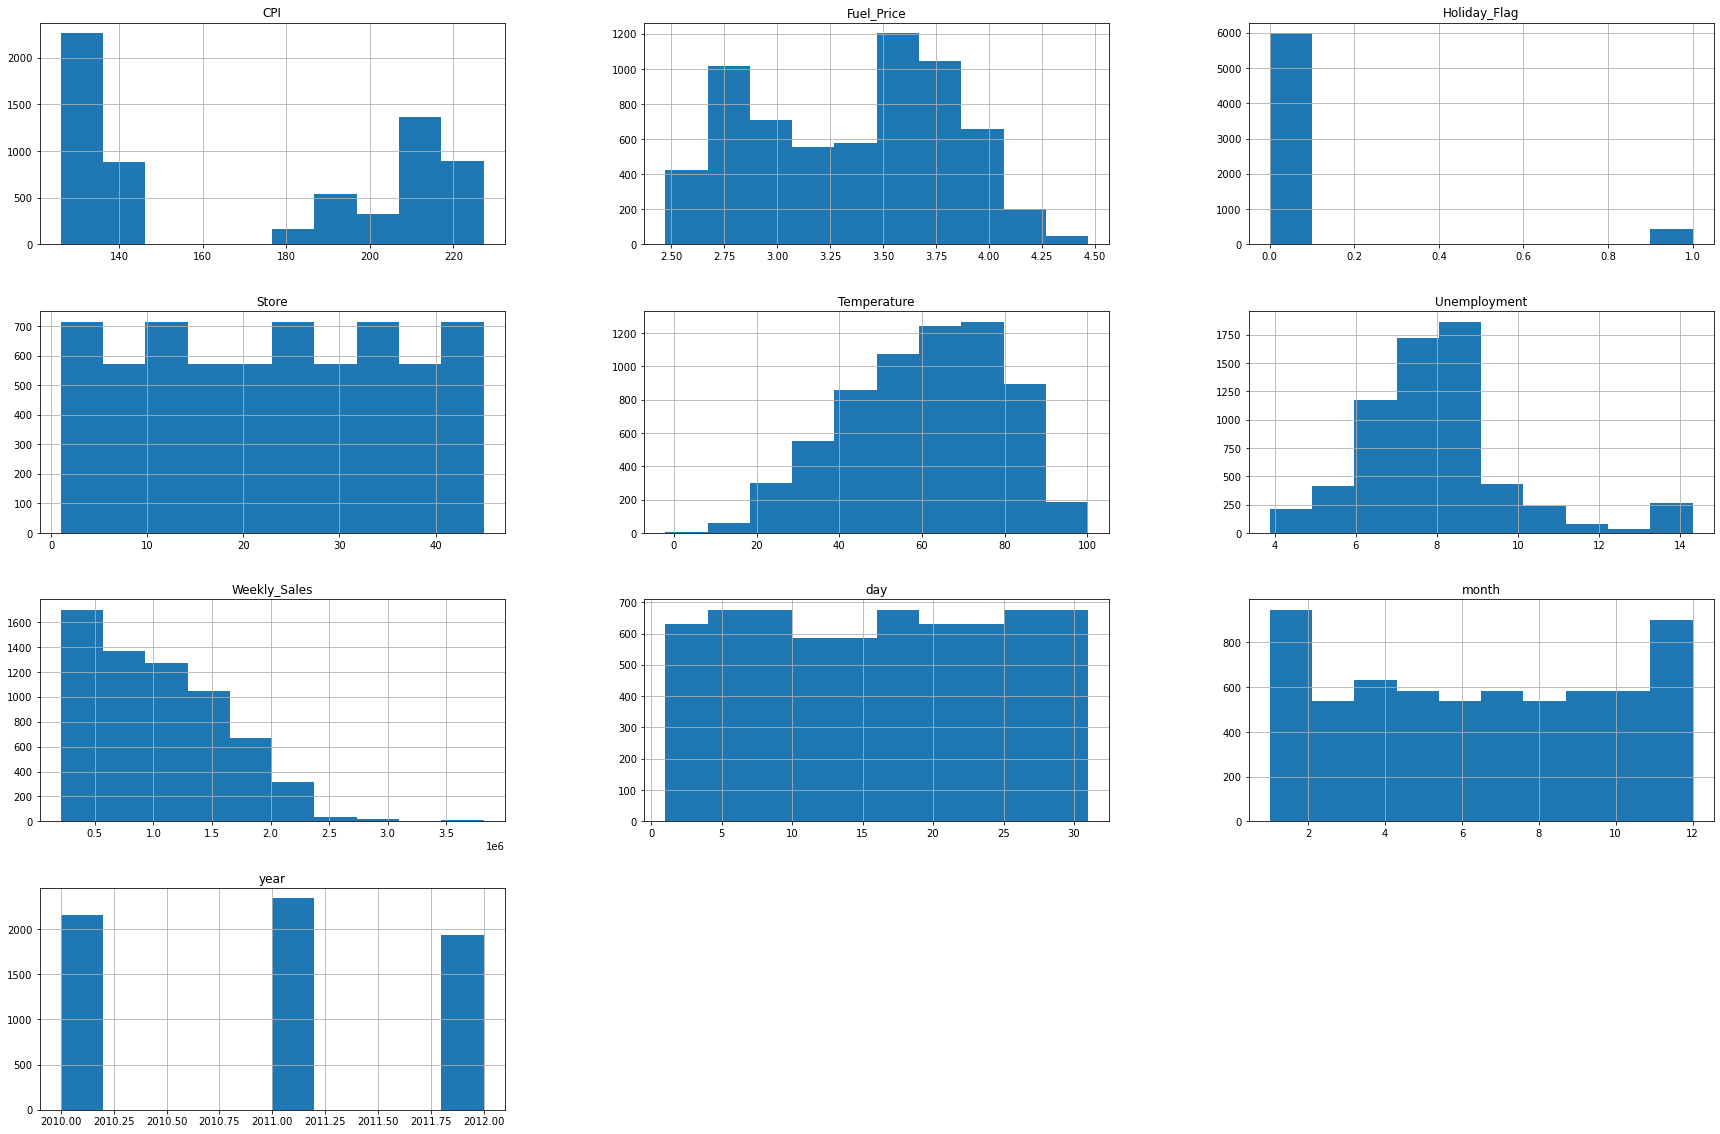

In [54]:
# distribution of the features of the dataset
# histograms
df.hist(figsize=(30,20));

### From the above histograms, we can understand that:

    the number of transactions occurred almost evenly across various stores and years.
    The distribution of weekly_sales right-skewed. Only a few of the weekly sales are above 2 million USD.
    The distribution of temperature is approximately normal.
    CPI formed two clusters.
    unemployment rate is near normally distributed.
    Four consecutive months November-February recorded the highest sales.

In [55]:
df.reset_index(inplace=True)

In [56]:
df.columns

Index(['Date', 'Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day'],
      dtype='object')

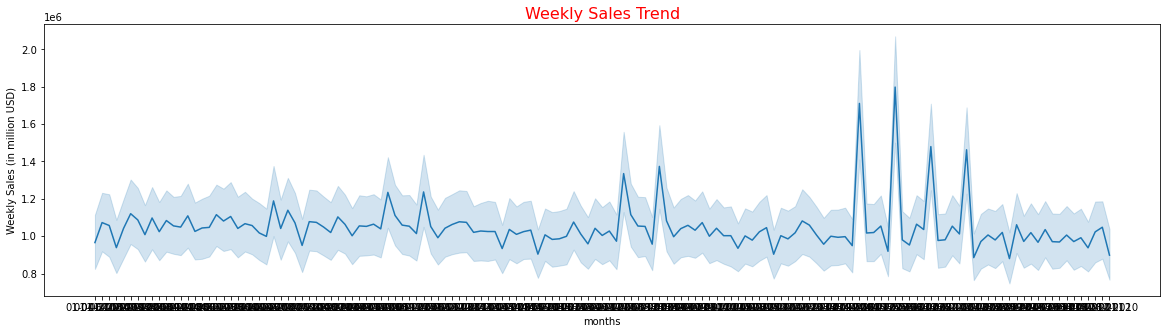

In [57]:
# plot the line chart of the weekly_sales
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df.Date, y=(df.Weekly_Sales))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.show()

### seasonality trends in the dataset
    Benefits of Seasonality trends analysis:
        1) Better forecast future sales
        2) Make more informed decisions about inventory and staffing
        3) Understand the drivers of customer demand leading to improved efficiency and profitability.

Going to create a pivot table to group the data by month and year and calculate the average sales for each period
and plot the average sales of the table using line chart for the three years. This will allow us to see if there are any patterns in the data that repeat at regular intervals.

In [58]:
# create the pivot table
pivot_table = df.pivot_table(index='month', columns='year', values='Weekly_Sales')
# display the pivot table
pivot_table

year,2010,2011,2012
month,,,
1,938663.91,942069.73,956781.66
2,1064371.56,1042273.35,1057997.03
3,1034590.12,1011263.11,1025509.64
4,1021176.61,1033219.67,1014126.60
5,1039303.27,1015564.82,1053948.46
6,1055082.09,1038471.22,1082919.51
7,1023701.98,997604.85,1025480.50
8,1025211.59,1044894.59,1064514.37
9,998355.89,1026810.06,998866.33


In [59]:
pivot_table.describe()

year,2010,2011,2012
count,12.00,12.00,12.00
mean,1050180.69,1047806.67,1032742.08
std,71497.24,82624.26,33427.27
min,938663.91,942069.73,956781.66
25%,1023070.63,1014489.39,1022340.22
50%,1030895.37,1030014.87,1034153.48
75%,1057404.45,1042928.66,1054960.60
max,1198413.37,1274310.93,1082919.51


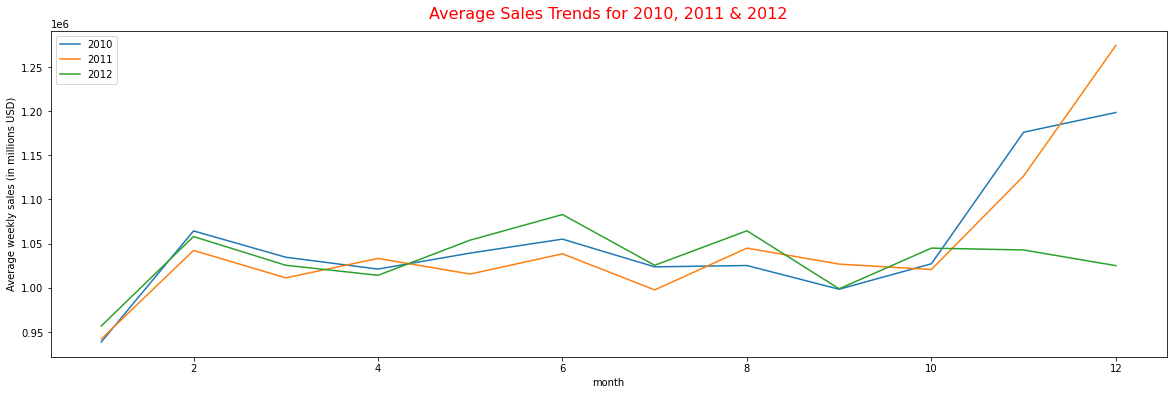

In [60]:
# plot the average sales
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_palette("bright")
sns.lineplot(x=pivot_table.index, y=pivot_table[2010], ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011], ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012], ax=ax, label='2012')
plt.ylabel('Average weekly sales (in millions USD)')
plt.title('Average Sales Trends for 2010, 2011 & 2012', fontdict ={'fontsize':16,
                                                                   'color':'red',
                                                                   'horizontalalignment': 'center'},
                                                                   pad=12)
# Add a legend
plt.legend()
plt.show()

    1) We can observe that the line charts for the three years for the month of January to October simultaneously follow a sawtooth shape with big rises experienced in November and December due to holidays. 
    2) This indicates seasonality trends as months do have consistencies in bigger or smaller sales for the three years. 
    3) The data for 2012 ends in October, which may explain the significant drop in sales for November.
    4) Average sales going down year on year
    5) Highest sales of the month reported in 2011   
    
    

### non-holiday weekly sales compared to holiday weekly sales

In [61]:
# filter out non-holiday and holiday weekly sales 
non_holiday_sales = df[df['Holiday_Flag'] == 0]
holiday_sales = df[df['Holiday_Flag'] == 1]

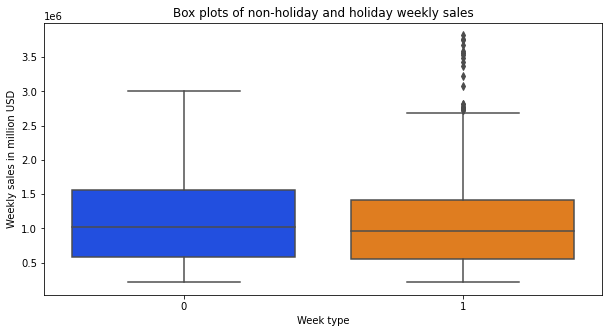

In [62]:
# plot box plots of non-holiday and holiday weekly sales 
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[holiday_sales['Weekly_Sales'], non_holiday_sales['Weekly_Sales']])
plt.ylabel('Weekly sales in million USD')
plt.xlabel('Week type')
plt.title('Box plots of non-holiday and holiday weekly sales')
plt.show()

We can see that both holiday and non-holiday weekly sales have similar spread. However, the bigger sales happen during the holiday weeks.

In [63]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
Store,1.00,-0.34,0.00,-0.02,0.06,-0.21,0.22,0.00,0.00,-0.00
Weekly_Sales,-0.34,1.00,0.04,-0.06,0.01,-0.07,-0.11,-0.02,0.07,-0.01
Holiday_Flag,0.00,0.04,1.00,-0.16,-0.08,-0.00,0.01,-0.06,0.33,-0.04
Temperature,-0.02,-0.06,-0.16,1.00,0.14,0.18,0.10,0.06,0.07,0.09
Fuel_Price,0.06,0.01,-0.08,0.14,1.00,-0.17,-0.03,0.78,-0.05,0.03
CPI,-0.21,-0.07,-0.00,0.18,-0.17,1.00,-0.30,0.07,0.00,0.00
Unemployment,0.22,-0.11,0.01,0.10,-0.03,-0.30,1.00,-0.24,-0.00,-0.01
year,0.00,-0.02,-0.06,0.06,0.78,0.07,-0.24,1.00,-0.14,-0.01
month,0.00,0.07,0.33,0.07,-0.05,0.00,-0.00,-0.14,1.00,0.01
day,-0.00,-0.01,-0.04,0.09,0.03,0.00,-0.01,-0.01,0.01,1.00


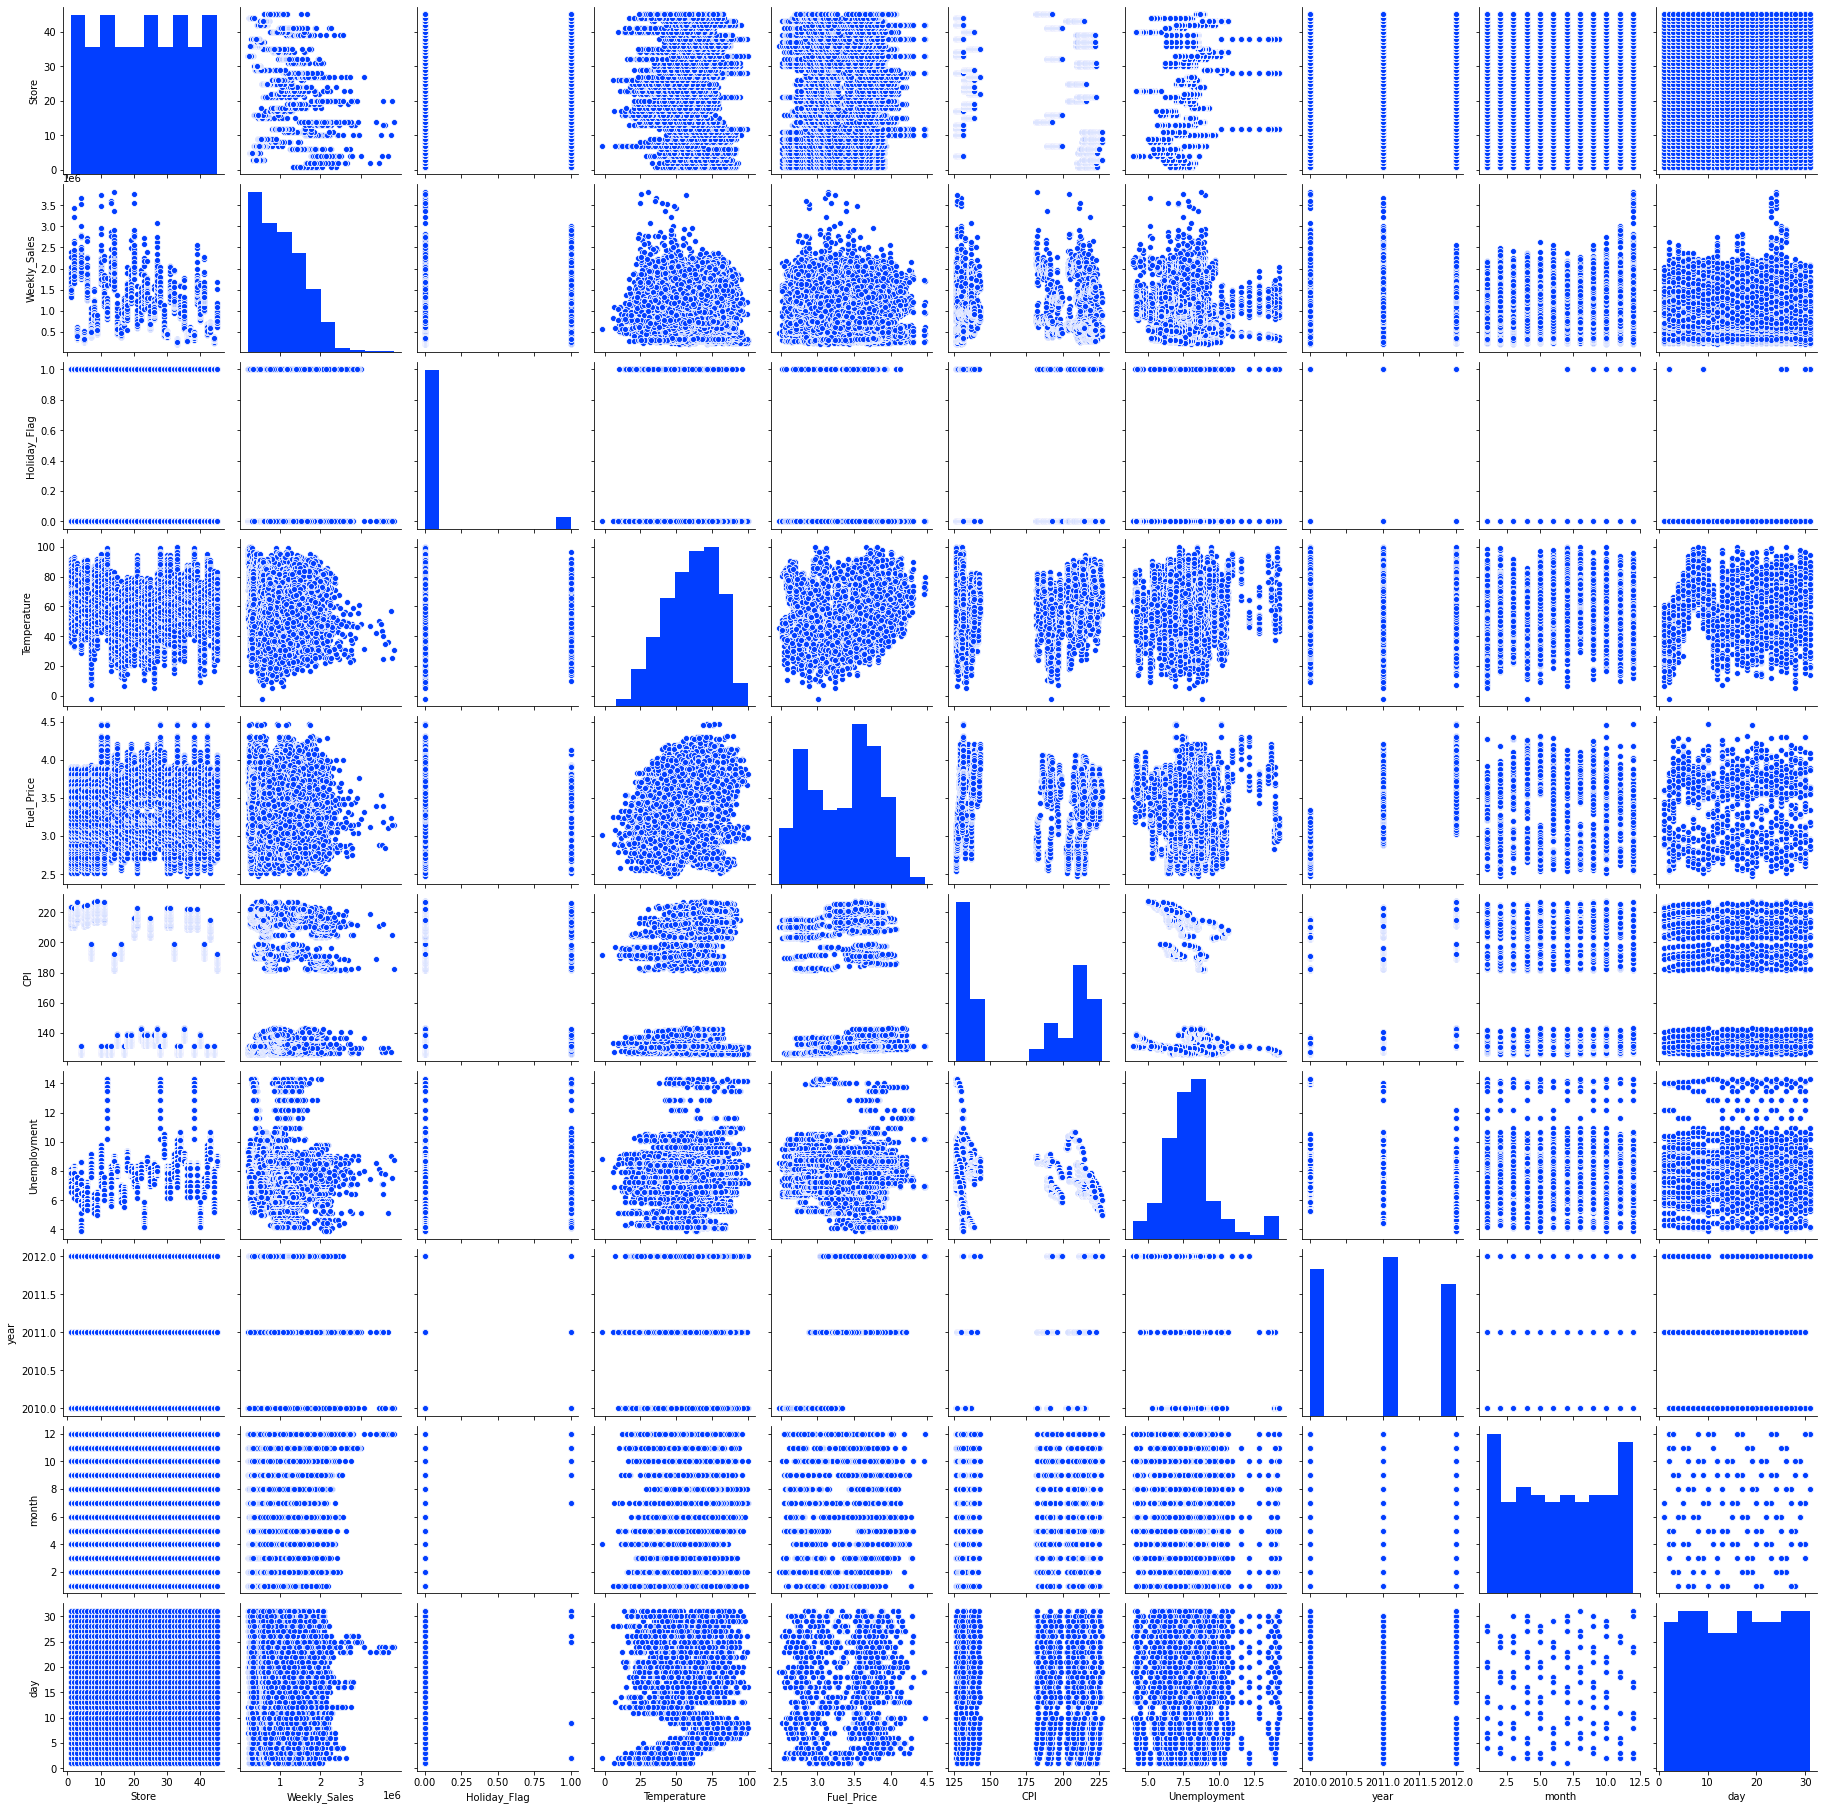

In [70]:
sns.pairplot(df)
plt.show()

### 4. Model Selection and Evaluation
    In this section, I will evaluate the performance of several different regressors on our data. I will use root mean squared error (RMSE) as our evaluation metric. RMSE is a measure of the difference between the predicted values and the true values. It is calculated as the square root of the mean squared error (MSE), where MSE is the average of the squared differences between the predicted and true values. Lower values of RMSE indicate better performance.

    I will fit and evaluate the following regressors:

        # Linear Regression
        # Decision Tree Regressor
        # Random Forest Regressor
        # Support Vector Regressor, etc.

    I will fit each of these regressors to our training data and make predictions on the test set. Then, we will calculate the RMSE of the predictions and compare the results to choose the best regressor.

    To ensure that the original dataset is not modified during the modeling process and to facilitate debugging if needed, I will create a copy of the preprocessed dataset before fitting our various models. This will help to preserve the integrity of the original data and allow us to refer to it if any issues arise during the modeling process.

In [72]:
# make a copy of the dataset
sales_copy = df.copy()

In [76]:
# drop the date and unemployment columns
sales_copy.drop(['Date', 'Unemployment'], axis=1, inplace=True)
# check
sales_copy.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,year,month,day
0,1,1643690.90,0,42.31,2.57,211.10,2010,5,2
1,1,1641957.44,1,38.51,2.55,211.24,2010,12,2
2,1,1611968.17,0,39.93,2.51,211.29,2010,2,19
3,1,1409727.59,0,46.63,2.56,211.32,2010,2,26
4,1,1554806.68,0,46.50,2.62,211.35,2010,5,3


In [79]:
X = sales_copy.drop('Weekly_Sales', axis=1)
y = sales_copy['Weekly_Sales']

##### Scaling the features

    Scaling is a preprocessing step that transforms the features of a dataset so that they have a similar scale and can improve the performance of some regression algorithms and facilitate comparison of the model's coefficients. In this project we will use standard scaler to standardize the features of the dataset.

In [84]:
# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Spltting the dataset

    To properly evaluate the performance of our dataset and prevent overfitting, I can use cross-validation techniques. One such technique is to split the dataset into a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate the model's performance. This can help us determine how well the model generalizes to unseen data and can identify any issues with overfitting. It is important to randomly shuffle the data before splitting it into the train and test sets, as this can help ensure that the data is representative of the overall population and not biased in any way.

In [85]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

##### Model training and evaluation

    In this subsection, I will create a function that will train multiple regressors and compare their performance using the root mean square error (RMSE) metric. We will use the RMSE values to compare the performance of the various regressors and determine which model has the lowest error and is therefore the best fit for our data.

In [86]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse

In [87]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.
    
    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models
    
    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """
    
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)

In [88]:
# initialize the regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [89]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]

In [90]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


,regressor_name,rmse
0,Random Forest Regression,126864.13
1,Decision Tree Regression,159398.22
2,Boosted Tree Regression,172653.69
3,Spline Regression,463346.74
4,Polynomial Regression,484191.91
5,K-Nearest Neighbour Regression,521565.32
6,Ridge Regression,522393.90
7,Lasso Regression,522394.23
8,Linear Regression,522394.31
9,Elastic Net Regression,527257.61


##### Result interpretation

    Let's interprete the result by evaluating the rmse value of the best model, the Random Forest Regressor.

In [95]:
# evaluate rmse for the regressors
rmse = evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

In [98]:
# pick the best rmse
best_rmse = rmse.iloc[0]['rmse']
# compute the median of the weekly sales 
median_sale = sales_copy['Weekly_Sales'].median()
# compute percentage error
percent_deviation = round((best_rmse*100/median_sale), 2)
# print the result
print('The model has average percentage error of {}%'.format(percent_deviation))

The model has average percentage error of 12.97%


    The above table shows that Random Forest Regressor outperformed all the regressors with RMSE of 126864.13. This provide a good estimate for future sales as it has about 13% average error compared to the typical median sale

### 5. Conclusions
    As per my analysis,Sales during holiday weeks are significantly higher than during non-holiday weeks, with sales doubling on average. Additionally, there is a strong seasonal component to the sales data. The average sales of the top performing stores are up to 500% higher than the lowest performing stores.

    The best model for predicting future sales is the Random Forest Regressor model,which achieved an RMSE of 126864.13. This is a good estimate as it is 87% close to the median sale of the data.

    These findings have important implications for businesses as they can inform decisions about inventory, staffing, and marketing efforts. By understanding the factors that drive sales and using a reliable model to forecast future sales, businesses can better plan for the future and optimize their resources.

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

